# Thinking about Risk and Uncertainty

This series of posts will be an introduction to the economics of risk and uncertainty as well as some finance. To make it easy to follow along, everything will be recorded in Python and uploaded to my Github as an iPython notebook.



If you were offered a bet that you were nearly certain to win, would you take it? Consider the following scenario:

You have \$100. In a lottery, you have an 80% chance of earning \$120 (\$100+20) and a 20% chance of losing your \$100. Would you choose to take such a bet? Would you play it the other way around and bet on the 20% chance to win \$180? Would you even play this bet at all? During the 2016 presidential election, several thousands of people made this very bet using political gambling websites (and not everyone was happy with the results).


![alt text](https://sparkcognition.com/wp-content/uploads/2016/10/ashvin-4.png)


From assessing stocks to picking insurance plans, risk assessment is incredibly valuable skill with a lot of hidden complexity. Furthermore, learning to understand risk better helps us engage with problems of judicial importance such as legal negligence standards and political importance such as climate change regulations. 

Even Batman V Superman makes a nod to the idea of existential risk calculus: 

![alt text](https://www.overthinkingit.com/wp-content/uploads/2016/03/bruce_wayne_1percent_doctrine-590x267.jpg)
#### “He has the power to wipe out the entire human race and if we believe there’s even if it’s a 1% chance that he is our enemy we have to take it as an absolute certainty!”

## The 2 characteristics of uncertain environments

Given a choice made by a decision maker, an outcome is any possible occurrence that affects someone in some way. Mathematically speaking, an **outcome** (the first characteristic) is a parameter that affects the well-being (utility) of the decision maker.

For simplicity’s sake, we assume that the number of possible outcomes is always finite: 


In [17]:
#First, get the import statements out of the way
from __future__ import division
import math
import numpy as np
from IPython.display import display, Image, HTML, Latex, Math
import pandas as pd
import matplotlib.pyplot as plt
import IPython.core.display as di

%matplotlib inline

In [18]:
#Outcomes are always finite in terms of some arbitrary N
N=5

#This lottery is of size N and has no outcomes
outcomes = [None]*N
print(outcomes)

[None, None, None, None, None]


For example, a coin flip would have 2 possible outcomes: Heads or Tails. But knowing the outcomes alone isn’t particularly interesting. What we’re interested in is the _outcomes_ and their _corresponding probabilities_. So, the vector of **probabilities** (the second characteristic) is the list of probabilities corresponding to a list of outcomes. Each probability must be $\ge$ 0 and the sum of the probabilities must equal 1.

If we assume that a coin is fair, then the probability of Heads is equal to 0.50, and the probability of Tails is also equal to 0.50. 

In [19]:
#The probabilities in an event where each outcome is equally likely
probabilities = [1/N for i in range(0,N)]
print(probabilities)

[0.2, 0.2, 0.2, 0.2, 0.2]


Together, the corresponding lists of outcomes and probabilities forms a **lottery**.

In [20]:
#A lottery is the list of outcomes and their corresponding probabilities
def lottery(outcomes, probs):
    assert len(outcomes)==len(probs)
    assert sum(probs)==1.0
    
    lotto= zip(outcomes, probs)
    return lotto

In [21]:
example_lottery = lottery(outcomes,probabilities)
print "Previous example", example_lottery,"\n"

#fair coin
sides = ['H','T']
coin_probs = [0.5,0.5]
coin_lotto = lottery(sides, coin_probs)
print "Fair coin flip:",coin_lotto,"\n"

#ex2 
ex2_outcomes = ["$1000", "$4", "$-300"]
ex2_probs = [0.1, .85, .05]
ex2_lotto = lottery(ex2_outcomes,ex2_probs)
print "Another example:",ex2_lotto,"\n"

Previous example [(None, 0.2), (None, 0.2), (None, 0.2), (None, 0.2), (None, 0.2)] 

Fair coin flip: [('H', 0.5), ('T', 0.5)] 

Another example: [('$1000', 0.1), ('$4', 0.85), ('$-300', 0.05)] 



Furthermore, a lottery may also contain lotteries. This is called a **compound lottery**.

In [22]:
#A compound lottery is a lottery that may contain other lotteries
ex3_outcomes = [10, coin_lotto]
ex3_probs = [0.5,0.5]
ex3_lotto = lottery(ex3_outcomes,ex3_probs)
print ex3_lotto

[(10, 0.5), ([('H', 0.5), ('T', 0.5)], 0.5)]


Just like with a probability mass function (PMF), we can calculate the **expected value** of a lottery by finding the sum of the products of each outcome and its probability.

In [23]:
def expected_value(lottery):
    mean = 0
    for outcome, probability in lottery:
        mean+= outcome*probability
    return mean

Here, the expected value is 0


In [24]:
ex3_lotto = lottery([1,-1],[.5,.5])
print expected_value(ex3_lotto)

0.0


Now, given this framework, we can calculate the value of a real lottery such as a powerball lottery.

In [25]:
#Odds of winning a jackpot (a rough guess)
powerball_prob = 1.0/300000000
#Odds of losing
loss_prob = 1-powerball_prob

#Jackpot
jackpot = 10000000
ticket_price = -1

powerball = lottery([jackpot,ticket_price],[powerball_prob,loss_prob])
print "The expected value of your ticket:",expected_value(powerball)

The expected value of your ticket: -0.966666663333


The expected value is a powerful idea because it helps us order our preferences between lotteries. The expected value implies three things:

•	When the expected value of a lottery is greater than a guaranteed option, a decision maker will choose the lottery. 

•	Conversely, if the expected value of a lottery is lower than a guaranteed option, a decision maker will always choose the guaranteed option. 

•	Finally, if the expected value of a lottery is equal to the value of a guaranteed option, the decision maker will be indifferent between the two. 

Simply put, For all lotteries $L1,L2$ either $L1 \succsim L2$ or $L2 \succsim L1$ where $\succsim$ indicates a preference relationship. For more information, check out the [Debreu theorems](https://en.wikipedia.org/wiki/Debreu_theorems "Debreu theorems")



# The St. Petersburg Paradox

Finding the expectation of a lottery may seem like a useful tool in most decision-making situations, but consider the following gamble:

Suppose you were made an offer. A fair coin would be tossed continuously until it turned up tails. If the coin came up tails on the $n^{th}$ toss, you would receive $\$2^n$ i.e. if it came up tails on the 5th toss, you would receive $\$2^5 = \$32$. How much would you be willing to pay to participate in this lottery?

Intuitively, we already know that not many people would spend much to play this game. But why? To visualize the paradox, we can re-write the game in Python.

**Game**: Get payoff that depends on when heads comes up first on toss of fair win.

**Payoff**: $2^i$ where $i$ = toss number of first H

In [26]:
def game():
    i = 0 #number of heads
    while(True):
        flip = (np.random.randint(low=0,high=2))
        #If the flip is a tails, return the payoff
        if flip == 0:
            return 2**(i-1)
        #If the flip is a heads, flip again
        else:
            i += 1

('Expected value of sample:', 2.8277999999999999)


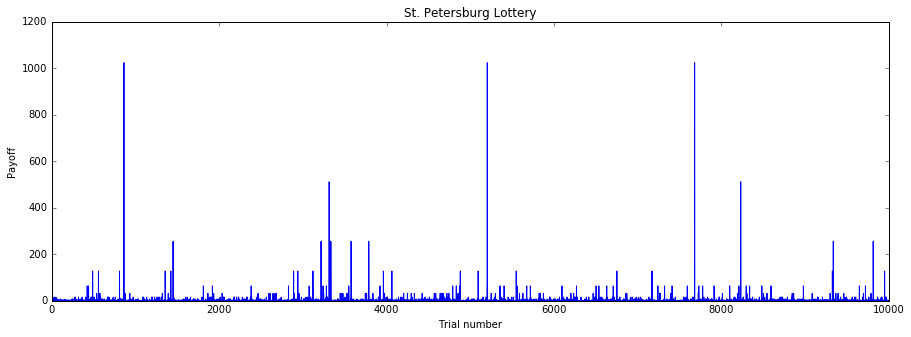

In [27]:
trials = [game() for x in xrange(0,10000)]

plt.figure(figsize=(15,5))
plt.plot(trials)
plt.xlabel("Trial number")
plt.ylabel("Payoff")
plt.title("St. Petersburg Lottery")
print("Expected value of sample:", np.mean(trials))

This question is asking for the amount someone would be willing to pay for such a lottery, so we can consider this question as asking for the certainty equivalent of the lottery. The __certainty equivalent__ is the guaranteed amount of money that an individual would consider just as desirable as a risky asset (lottery). We calculate the certainty equivalent by taking the expected value of the lottery. But given exponential payoff of this function, we encounter a problem: This gamble as an _infinite expected value_!

Expected payoff = $(\frac{1}{2}^0 *2^0) + (\frac{1}{2}*2^1) + (\frac{1}{2}^2 *2^2) + (\frac{1}{2}^3 *2^3) + … + (\frac{1}{2}^i *2^i)  =\infty $

Despite the fact that the expected payoff is $∞$, only a few people are willing to pay much for this lottery.

This problem is known as the St. Petersburg Paradox. To understand why decision makers are not willing to purchase this lottery, it is important to understand that decision makers are __utility maximizers__ not __outcome maximizers__. Instead of calculating the expected value of the lottery, we instead calculate the __expected utility__ of the lottery. 


Mathematician Daniel Bernoulli, the brother of the man who created the paradox, suggested that when we take utility into account, we can develop a solution. He states, “_The determination of the value of an item must not be based on the price, but rather on the utility it yields…. There is no doubt that a gain of one thousand ducats is more significant to the pauper than to a rich man though both gain the same amount_”

This theory of utility maximization is explained by the law of __diminishing marginal utility__ which states that when a decision maker consumes a specific good, the next good consumed will be less enjoyable than the previous. So, the marginal utility, the difference of utility between the consumption of a good and the consumption of a consecutive good, will decrease. 


In [28]:
def utility_table(size):
    n = np.arange(0, size, 1)

    p = pd.DataFrame()
    p['n'] = n
    payoff = 2**n
    p['Payoff'] = payoff
    p['Probability'] = 0.5**n
    p['Expected Payoff'] = p['Payoff']*p['Probability']
    p['Bernoulli Utility Function'] = np.log(payoff)
    p['Expected Utility'] = p['Bernoulli Utility Function']*p['Probability']
    return p

table = utility_table(size=10)
display(HTML(table.to_html(index=False)))



n,Payoff,Probability,Expected Payoff,Bernoulli Utility Function,Expected Utility
0,1,1.000000,1,0.000000,0.000000
1,2,0.500000,1,0.693147,0.346574
2,4,0.250000,1,1.386294,0.346574
3,8,0.125000,1,2.079442,0.259930
4,16,0.062500,1,2.772589,0.173287
5,32,0.031250,1,3.465736,0.108304
6,64,0.015625,1,4.158883,0.064983
7,128,0.007812,1,4.852030,0.037906
8,256,0.003906,1,5.545177,0.021661
9,512,0.001953,1,6.238325,0.012184


Given Bernoulli’s hypothesis of diminishing marginal utility, we can show that although the outcomes increase with each bet, the _utility gained from each consecutive outcome will be lower than the last_. Bernoulli suggests that we can model the decision maker’s utility using a natural log function. The natural log function is useful since it is __monotonic__ (each additional unit provides additional gains in utility) yet __diminishing__ such that the gains converge to 0 as x approaches $\infty$. 
$$u (x) = ln(x) \\  u'(x) = 1 / x$$

[]

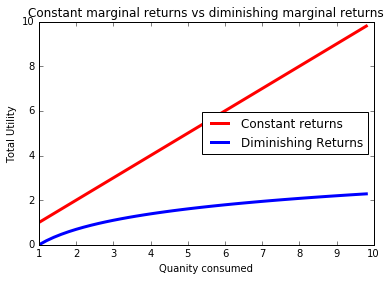

In [29]:
t = np.arange(1, 10, 0.2)

constant = plt.plot(t, t, 'r', label="Constant returns", linewidth=3)
diminishing = plt.plot(t, np.log(t), 'b', label="Diminishing Returns",linewidth=3)
plt.legend(loc="center right",)

plt.xlabel("Quanity consumed")
plt.ylabel("Total Utility")
plt.title("Constant marginal returns vs diminishing marginal returns")
plt.plot()

Graphically, we can see utility uniformly increases as the payoff exponentially increases. However, the expected utility __decreases__ since the probability exponentially decreases. 


[]

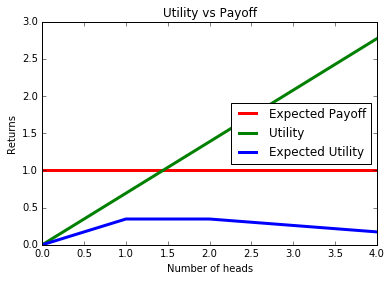

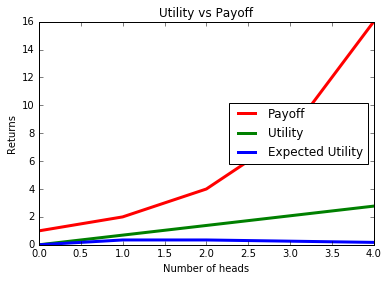

In [30]:
table = utility_table(size=5)

plt.figure("Bernoulli Utility Function")

expected_payoff= plt.plot(table['n'], table['Expected Payoff'], 'r', label="Expected Payoff",linewidth=3)
diminishing = plt.plot(table['n'], table['Bernoulli Utility Function'], 'g', label="Utility",linewidth=3)
expected_utility = plt.plot(table['n'], table['Expected Utility'], 'b', label="Expected Utility",linewidth=3)
plt.legend(loc="center right",)
plt.xlabel("Number of heads")
plt.ylabel("Returns")
plt.title("Utility vs Payoff")
plt.plot()

plt.figure("Comparison")
constant = plt.plot(table['n'], table['Payoff'], 'r', label="Payoff", linewidth=3)
diminishing = plt.plot(table['n'], table['Bernoulli Utility Function'], 'g', label="Utility",linewidth=3)
expected = plt.plot(table['n'], table['Expected Utility'], 'b', label="Expected Utility",linewidth=3)

plt.legend(loc="center right",)
plt.xlabel("Number of heads")
plt.ylabel("Returns")
plt.title("Utility vs Payoff")
plt.plot()

For calculating the certainty equivalent, we need to take the sum of the expected utilities for an infinite number of trials. Since the function converges, we can reach an estimate as n approaches $\infty$
    $$E(L) = \sum_{n=1}^{\infty} \frac{1}{2}^x * ln(x) \\ = \sum_{n=1}^{\infty} 2^{-x} * ln(x)$$


So, we can estimate the certainty equivalent as:
    

In [31]:
table = utility_table(size=1000)
util_lottery = np.sum(table['Expected Utility'])
print("The expected utility of the lottery is ",util_lottery)
print("The certainty equivalent of the lottery is ",math.exp(util_lottery))


('The expected utility of the lottery is ', 1.3862943404624948)
('The certainty equivalent of the lottery is ', 3.9999999173704177)


Since we are still dealing with a utility function, the certainty equivalent will not be 1.386. Instead, it will be the antilog of 1.386. In other words, we are trying to find the parameter that makes our utility function = 1.386.
So, we can estimate the certainty equivalent as:
$$CE = e^{E(L)} = e^{1.386} = 4$$


## A final note

The logarithmic utility function that Bernoulli proposes is case specific to the $2^n$ lottery. By adjusting the values in the lottery, we can again make it a paradox with an infinite expected value. The St. Petersburg paradox is used to demonstrate that there are diminishing marginal returns to utility and we can take further steps to model choices under uncertainty.